# Численное интегрирование в Julia: От теории к практике
# Numerical Integration in Julia: From Theory to Practice

**Контекст курса / Course Context:**

Этот материал является частью **Второй части курса**: "Решение задач вычислительной математики на Julia". В биологии и медицине численное интегрирование часто используется для расчета площади под кривой (AUC - Area Under Curve), например, при оценке биодоступности лекарств или общей экспозиции патогена в организме.

This material is part of **Part 2 of the Course**: "Solving Computational Mathematics Problems in Julia". In biology and medicine, numerical integration is often used to calculate the Area Under the Curve (AUC), for example, when assessing drug bioavailability or total pathogen exposure in the body.



## 1. Теоретические основы / Theoretical Foundations

Для вычисления определенного интеграла $I = \int_{a}^{b} f(x) \, dx$ численными методами мы разбиваем отрезок $[a, b]$ на $N$ равных частей с шагом $h = \frac{b-a}{N}$. Узлы сетки определяются как $x_i = a + i \cdot h$, где $i = 0, 1, \dots, N$.

To compute the definite integral $I = \int_{a}^{b} f(x) \, dx$ using numerical methods, we divide the interval $[a, b]$ into $N$ equal parts with step size $h = \frac{b-a}{N}$. The grid nodes are defined as $x_i = a + i \cdot h$, where $i = 0, 1, \dots, N$.



### 1.1 Метод левых прямоугольников / Left Rectangle Rule
Аппроксимируем площадь под кривой суммой площадей прямоугольников, высота которых равна значению функции в левой точке интервала.

We approximate the area under the curve by the sum of areas of rectangles, where the height is equal to the function value at the left point of the interval.

$$ I_{left} \approx h \sum_{i=0}^{N-1} f(x_i) $$

### 1.2 Метод правых прямоугольников / Right Rectangle Rule
Высота прямоугольника берется в правой точке интервала.

The height of the rectangle is taken at the right point of the interval.

$$ I_{right} \approx h \sum_{i=1}^{N} f(x_i) $$

### 1.3 Метод средних прямоугольников / Midpoint Rule
Высота прямоугольника берется в середине интервала $x_{i+1/2} = \frac{x_i + x_{i+1}}{2}$. Этот метод обычно точнее методов левых/правых прямоугольников.

The height of the rectangle is taken at the midpoint of the interval $x_{i+1/2} = \frac{x_i + x_{i+1}}{2}$. This method is usually more accurate than the left/right rectangle methods.

$$ I_{mid} \approx h \sum_{i=0}^{N-1} f\left(\frac{x_i + x_{i+1}}{2}\right) $$



### 1.4 Метод Симпсона (парабол) / Simpson's Rule
Аппроксимируем функцию на каждой паре интервалов квадратичной параболой. Требует четного количества интервалов $N$.

We approximate the function on each pair of intervals with a quadratic parabola. Requires an even number of intervals $N$.

$$ I_{simp} \approx \frac{h}{3} \left( f(x_0) + 4\sum_{i=1, odd}^{N-1} f(x_i) + 2\sum_{i=2, even}^{N-2} f(x_i) + f(x_N) \right) $$


## 2. Реализация на Julia / Implementation in Julia

**Рекомендация по среде / Environment Recommendation:**
Да, совмещать расчеты, формулы и текст лучше всего в формате **Jupyter Notebook** (пакет `IJulia`) или **Pluto.jl**. Это позволяет выполнять код ячейками и видеть результат сразу под формулами. 

Yes, combining calculations, formulas, and text is best done in **Jupyter Notebook** format (`IJulia` package) or **Pluto.jl**. This allows executing code in cells and seeing results immediately under formulas. 

Сначала установим необходимые пакеты (если не установлены):

First, let's install the necessary packages (if not installed):


In [1]:
# using Pkg
# Pkg.add("QuadGK")  # Для точного вычисления интеграла / For exact integration
# Pkg.add("Plots")   # Для визуализации / For visualization
# Pkg.add("DataFrames") # Для таблиц / For tables
# Pkg.add("Printf")  # Для красивого вывода чисел / For nice number formatting


Теперь загрузим пакеты и напишем функции.

Now let's load the packages and write the functions.

In [2]:
using QuadGK      # Библиотека для адаптивного интегрирования (эталон)
                  # Library for adaptive quadrature (ground truth)
using Plots       # Библиотека для построения графиков
                  # Library for plotting
using DataFrames  # Для удобного сравнения результатов
                  # For convenient comparison of results
using Printf      # Для форматированного вывода
                  # For formatted output


In [3]:

# Определим тестируемую функцию. 
# Пусть это будет модель концентрации лекарства: затухающая синусоида.
# Let's define a test function.
# Let it be a drug concentration model: decaying sinusoid.
f(x) = exp(-0.5 * x) * sin(x)

# Границы интегрирования / Integration limits
a = 0.0
b = 4 * pi



12.566370614359172

In [4]:

# --- Функции численного интегрирования ---
# --- Numerical Integration Functions ---

"""
    left_rectangle(f, a, b, N)
Метод левых прямоугольников.
Left Rectangle Rule.
"""
function left_rectangle(f, a, b, N)
    h = (b - a) / N
    # Суммируем значения от 0 до N-1
    # Sum values from 0 to N-1
    total = 0.0
    for i in 0:(N-1)
        x_i = a + i * h
        total += f(x_i)
    end
    return h * total
end


left_rectangle

In [5]:

"""
    right_rectangle(f, a, b, N)
Метод правых прямоугольников.
Right Rectangle Rule.
"""
function right_rectangle(f, a, b, N)
    h = (b - a) / N
    # Суммируем значения от 1 до N
    # Sum values from 1 to N
    total = 0.0
    for i in 1:N
        x_i = a + i * h
        total += f(x_i)
    end
    return h * total
end


right_rectangle

In [6]:
"""
    midpoint_rectangle(f, a, b, N)
Метод средних прямоугольников.
Midpoint Rectangle Rule.
"""
function midpoint_rectangle(f, a, b, N)
    h = (b - a) / N
    total = 0.0
    for i in 0:(N-1)
        # Середина интервала / Midpoint of the interval
        x_mid = a + (i + 0.5) * h
        total += f(x_mid)
    end
    return h * total
end


midpoint_rectangle

In [7]:

"""
    simpson_rule(f, a, b, N)
Метод Симпсона. N должно быть четным.
Simpson's Rule. N must be even.
"""
function simpson_rule(f, a, b, N)
    if N % 2 != 0
        N += 1 # Делаем четным / Make it even
        @warn "N was odd, increased to $N"
    end
    h = (b - a) / N
    
    total = f(a) + f(b)
    
    # Нечетные индексы (коэффициент 4)
    # Odd indices (coefficient 4)
    for i in 1:2:(N-1)
        total += 4 * f(a + i * h)
    end
    
    # Четные индексы (коэффициент 2)
    # Even indices (coefficient 2)
    for i in 2:2:(N-2)
        total += 2 * f(a + i * h)
    end
    
    return (h / 3) * total
end


simpson_rule


## 3. Эксперимент и сравнение / Experiment and Comparison

Мы вычислим интеграл для трех разных значений $N$: 10, 100, 1000.
В качестве "истинного" значения будем использовать результат из пакета `QuadGK`, который использует адаптивные алгоритмы высокой точности.
We will compute the integral for three different values of $N$: 10, 100, 1000.
As the "true" value, we will use the result from the `QuadGK` package, which uses high-precision adaptive algorithms.


In [8]:
# Вычисление "истинного" значения
# Calculation of the "true" value
true_val, error_est = quadgk(f, a, b)

println("Истинное значение интеграла (QuadGK): $(true_val)")
println("True integral value (QuadGK): $(true_val)")
println("-" ^ 50)


Истинное значение интеграла (QuadGK): 0.7985060458146335
True integral value (QuadGK): 0.7985060458146335
--------------------------------------------------


In [9]:

# Список количеств шагов для проверки
# List of step counts to test
N_values = [10, 100, 1000]

# Инициализация DataFrame для хранения результатов
# Initialize DataFrame to store results
results = DataFrame(
    N = Int[],
    Method = String[],
    Approximation = Float64[],
    Absolute_Error = Float64[]
)

# Цикл по методам и шагам
# Loop over methods and steps
methods = [
    ("Left Rect", left_rectangle),
    ("Right Rect", right_rectangle),
    ("Midpoint", midpoint_rectangle),
    ("Simpson", simpson_rule)
]

for (name, func) in methods
    for N in N_values
        # Для Симпсона гарантируем четность внутри функции, но для лога пишем исходное
        # For Simpson we ensure evenness inside function, but log original for record
        approx = func(f, a, b, N)
        err = abs(approx - true_val)
        
        push!(results, (N, name, approx, err))
    end
end

# Вывод таблицы результатов
# Display results table
display(results)


Row,N,Method,Approximation,Absolute_Error
,Int64,String,Float64,Float64
1,10,Left Rect,0.666459,0.132047
2,100,Left Rect,0.797192,0.00131358
3,1000,Left Rect,0.798493,1.31349e-5
4,10,Right Rect,0.666459,0.132047
5,100,Right Rect,0.797192,0.00131358
6,1000,Right Rect,0.798493,1.31349e-5
7,10,Midpoint,0.864776,0.0662698
8,100,Midpoint,0.799163,0.00065682
9,1000,Midpoint,0.798513,6.56746e-6



### Анализ результатов / Results Analysis

Обратите внимание на столбец `Absolute_Error`.
1.  **Методы прямоугольников (левый/правый):** Ошибка убывает пропорционально $1/N$ (первый порядок точности).
2.  **Метод средних прямоугольников:** Ошибка убывает пропорционально $1/N^2$ (второй порядок точности).
3.  **Метод Симпсона:** Ошибка убывает пропорционально $1/N^4$ (четвертый порядок точности). При $N=100$ он уже дает машинную точность для этой функции.

Notice the `Absolute_Error` column.
1.  **Rectangle Methods (Left/Right):** Error decreases proportionally to $1/N$ (first order of accuracy).
2.  **Midpoint Rectangle Method:** Error decreases proportionally to $1/N^2$ (second order of accuracy).
3.  **Simpson's Method:** Error decreases proportionally to $1/N^4$ (fourth order of accuracy). At $N=100$, it already gives machine precision for this function.



## 4. Визуализация / Visualization

Визуальное сравнение помогает понять, почему одни методы точнее других. Построим график функции и аппроксимацию методом Симпсона и левых прямоугольников при малом $N$.
Visual comparison helps understand why some methods are more accurate than others. Let's plot the function and the approximation using Simpson's method and Left Rectangles at small $N$.



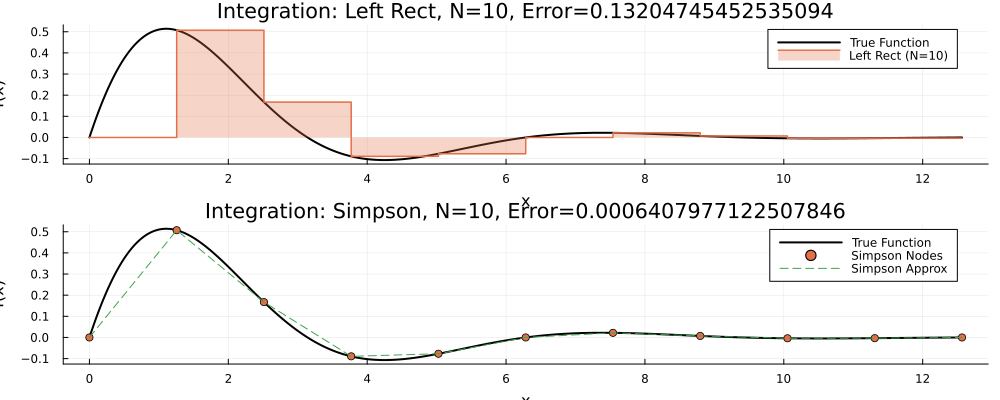

In [10]:

function plot_integration(method_func, method_name, N)
    h = (b - a) / N
    x_range = range(a, b, length=1000)
    y_true = f.(x_range)
    
    # Точки для метода
    # Points for the method
    x_nodes = [a + i * h for i in 0:N]
    y_nodes = f.(x_nodes)
    
    # Для отрисовки "ступенек" или парабол нужно больше точек
    # To draw "steps" or parabolas we need more points
    x_plot = []
    y_plot = []
    
    if method_name == "Left Rect"
        for i in 0:(N-1)
            push!(x_plot, x_nodes[i+1], x_nodes[i+2])
            push!(y_plot, y_nodes[i+1], y_nodes[i+1])
        end
    elseif method_name == "Simpson"
        # Для Симпсона просто соединим точки сплайном для наглядности
        # For Simpson just connect points with spline for clarity
        x_plot = x_nodes
        y_plot = y_nodes
    end
    
    p = plot(x_range, y_true, label="True Function", linewidth=2, color=:black)
    
    if method_name == "Left Rect"
        plot!(x_plot, y_plot, label=method_name * " (N=$N)", linestyle=:solid, linewidth=1.5, fillalpha=0.3, fillrange=0)
    else
        scatter!(x_nodes, y_nodes, label=method_name * " Nodes", markersize=4)
        plot!(x_plot, y_plot, label=method_name * " Approx", linestyle=:dash)
    end
    
    title!("Integration: $method_name, N=$N, Error=$(abs(method_func(f,a,b,N) - true_val))")
    xlabel!("x")
    ylabel!("f(x)")
    return p
end

# Построение графиков (пример для N=10)
# Plotting graphs (example for N=10)
N_demo = 10
p1 = plot_integration(left_rectangle, "Left Rect", N_demo)
p2 = plot_integration(simpson_rule, "Simpson", N_demo)

# Отобразить графики рядом
# Display plots side by side
plot(p1, p2, layout=(2, 1), size=(1000, 400))


## 5. Выводы для биомоделирования / Conclusions for Biomodeling

1.  **Выбор метода:** Для большинства задач фармакокинетики (расчет AUC) метода трапеций (близок к средним прямоугольникам) или Симпсона достаточно при плотном наборе данных.
2.  **Производительность:** Julia позволяет писать циклы (как в коде выше) без потери скорости. Не нужно стремиться к векторизации любой ценой, как в Python/Matlab, главное — типизация.
3.  **Точность:** При работе с экспериментальными данными (шумными) методы высокого порядка (Симпсон) могут быть чувствительны к шуму. Иногда простые методы надежнее.

1.  **Method Selection:** For most pharmacokinetic tasks (AUC calculation), the Trapezoidal rule (close to Midpoint) or Simpson's method is sufficient with dense data sampling.
2.  **Performance:** Julia allows writing loops (as in the code above) without performance loss. There is no need to strive for vectorization at any cost, as in Python/Matlab; the main thing is type stability.
3.  **Accuracy:** When working with experimental (noisy) data, high-order methods (Simpson) can be sensitive to noise. Sometimes simpler methods are more robust.





### Как запустить этот код? / How to run this code?

1.  **Вариант А (Jupyter):** Установите Julia, затем в режиме REPL введите `using IJulia; notebook()`. Создайте новый ноутбук и вставляйте код по частям в ячейки.
2.  **Вариант Б (Pluto):** Установите пакет `Pluto`, запустите `using Pluto; Pluto.run()`. Создайте новый файл, вставьте весь код. Pluto автоматически обновит выводы при изменении кода.
3.  **Вариант В (VS Code):** Используйте расширение "Julia" для VS Code и создайте файл `.jl` или `.ipynb`.

1.  **Option A (Jupyter):** Install Julia, then in REPL mode type `using IJulia; notebook()`. Create a new notebook and paste code parts into cells.
2.  **Option B (Pluto):** Install `Pluto` package, run `using Pluto; Pluto.run()`. Create a new file, paste all code. Pluto will automatically update outputs when code changes.
3.  **Option C (VS Code):** Use the "Julia" extension for VS Code and create a `.jl` or `.ipynb` file.